# Clustering networks

In [150]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log
_log.setLevel('ERROR')

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import Counter
from hdbscan import HDBSCAN
from matplotlib.cm import get_cmap
from sklearn.manifold import spectral_embedding
from umap import UMAP

%matplotlib inline

seed = 42
random_state = np.random.RandomState(seed)

Defining the network:

In [151]:
# G = nx.erdos_renyi_graph(1000, .003, seed=seed)
G = nx.read_edgelist("air_traffic.edgelist")
# G = nx.read_edgelist("academic_collaboration.edgelist")

Reducing dimensions with Spectral Embedding and UMAP and clustering with HDBSCAN:

clusters: 14
noise level: 0.192


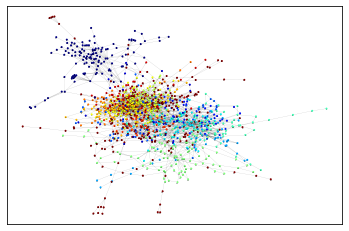

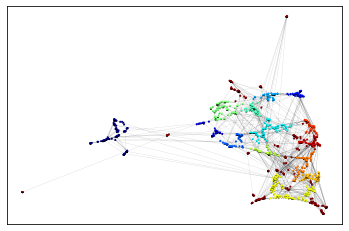

In [152]:
adj_matrix = nx.to_numpy_array(G)
node_list = list(G.nodes()) 

embedding = spectral_embedding(adj_matrix, n_components=50, drop_first=False, random_state=random_state)
embedding = UMAP(n_components=2, n_neighbors=30, min_dist=0.0, random_state=random_state).fit_transform(embedding)
clusters = HDBSCAN(min_samples=1, min_cluster_size=40).fit_predict(embedding)

print(f"clusters: {np.amax(clusters) + 1}")
print(f"noise level: {np.round(Counter(clusters)[-1] / len(clusters), 3)}")

cmap = get_cmap('jet')(np.linspace(0, 1.0, np.amax(clusters) + 2))
pos_fr = nx.fruchterman_reingold_layout(G, seed=seed)
pos_spectral_umap = {node_list[i]: embedding[i] for i in range(len(node_list))}

def draw_network(G, pos, node_size, node_color, edge_width, label_font_size, pdf_filename):
    nx.draw_networkx_nodes(G, pos=pos, node_size=node_size, node_color=node_color)
    nx.draw_networkx_edges(G, pos=pos, width=edge_width)
    nx.draw_networkx_labels(G, pos=pos, font_size=label_font_size)
    plt.savefig(f"{pdf_filename}.pdf")
    plt.show()

draw_network(G, pos_fr, 1, [cmap[clusters[i]] for i in range(len(clusters))], .05, 1, "graph_fr")
draw_network(G, pos_spectral_umap, 1, [cmap[clusters[i]] for i in range(len(clusters))], .05, 1, "graph_spectral_umap")

Removing nodes labeled as noise by HDBSCAN:

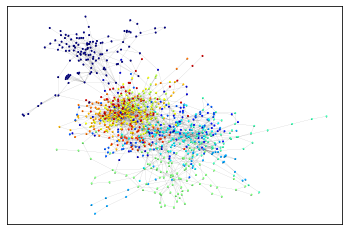

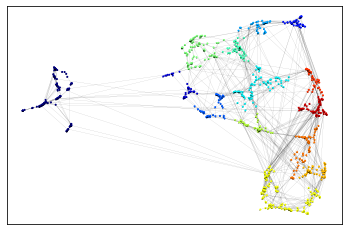

In [153]:
G.remove_nodes_from([node_list[i] for i in range(len(node_list)) if clusters[i] == -1])
node_list = list(G.nodes())
clusters = [clusters[i] for i in range(len(clusters)) if clusters[i] != -1]

draw_network(G, pos_fr, 1, [cmap[clusters[i]] for i in range(len(clusters))], .05, 1, "graph_without_noise_fr")
draw_network(G, pos_spectral_umap, 1, [cmap[clusters[i]] for i in range(len(clusters))], .05, 1, 
             "graph_without_noise_spectral_umap")